In [ ]:
import datetime as dt
import pandas as pd
import numpy as np
import calendar

from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

The Python code snippet provided is part of a larger script aimed at downloading historical stock data for the ASX200 index (represented by the `^AXJO` ticker symbol), specifically the closing prices, and setting up the necessary Python environment for further analysis related to historical volatility. The ASX200, officially known as the S&P/ASX 200, is a stock market index that measures the performance of the 200 largest index-eligible stocks listed on the Australian Securities Exchange (ASX) by float-adjusted market capitalization. It's the primary benchmark for the Australian equity market, similar to how the S&P 500 serves as a benchmark in the United States.

Here's a breakdown of each component and its significance:

1. **Setting Date Variables**:
    ```python
    end = dt.datetime.now()
    start = dt.datetime(2000,1,1)
    ```
    - `end`: This variable is set to the current date and time (`dt.datetime.now()`). It marks the end date for the data retrieval.
    - `start`: Set to January 1, 2000 (`dt.datetime(2000,1,1)`). It defines the start date from which the historical data should be retrieved.

2. **Fetching Data**:
    ```python
    df = pdr.get_data_yahoo(['^AXJO'], start, end)
    ```
    - This line uses the `pandas_datareader`'s function `get_data_yahoo` to download historical data from Yahoo Finance for the ASX200 index (`^AXJO`). The data fetched includes various metrics like open, high, low, close prices, and volume from the start date to the end date.

3. **Accessing Closing Prices**:
    ```python
    Close = df.Close
    Close.head()
    ```
    - `Close = df.Close`: Extracts the `Close` column from the dataframe `df`. This column represents the closing prices of the index for each trading day. Closing prices are often used in financial analysis because they represent the most stable price of the day, after all trading has finished, minimizing intraday volatility.
    - `Close.head()`: This method prints the first five rows of the closing prices dataframe. It's typically used to quickly inspect the first few entries of your dataset to ensure data has been loaded correctly.!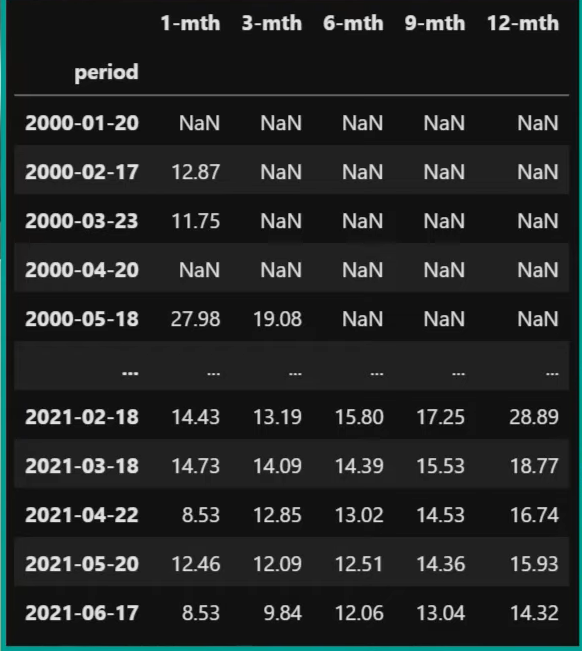


In [ ]:
end = dt.datetime.now()
start = dt.datetime(2000,1,1)

df = pdr.get_data_yahoo(['^AXJO'], start, end)
Close = df.Close
Close.head()

The additional code snippet provided calculates the logarithmic returns of the ASX200 index's closing prices and plots the historical volatility. Let's break down each part to understand its purpose and functionality:

1. **Calculating Logarithmic Returns**:
    ```python
    log_returns = np.log(df.Close/df.Close.shift(1)).dropna()
    ```
    - `df.Close/df.Close.shift(1)`: This expression calculates the ratio of each closing price to the previous day's closing price. `df.Close.shift(1)` shifts the data by one row downwards, thus making this division yield the daily returns (as a ratio).
    - `np.log(...)`: The natural logarithm of the daily return ratios is taken. Logarithmic returns are commonly used in financial analysis as they are time additive—a property useful for analyzing assets over time and managing portfolio risks.
    - `.dropna()`: Removes any `NaN` values that result from the shifting operation (the first row in the dataset will always be `NaN` since it has no previous row to form a ratio).

2. **Plotting Logarithmic Returns**:
    ```python
    log_returns.plot()
    ```
    - This command uses `matplotlib` to plot the logarithmic returns of the ASX200 index. The plot helps visually assess the daily return fluctuations over the entire period covered by the data.

3. **Calculating and Plotting Volatility**:
    ```python
    TRADING_DAYS = 20
    volatility = log_returns.rolling(window=TRADING_DAYS).std()*np.sqrt(252)
    volatility.plot()
    ```
    - `TRADING_DAYS = 20`: Defines the window size as 20 days, typically representing one trading month.
    - `log_returns.rolling(window=TRADING_DAYS).std()`: Computes the rolling standard deviation of the log returns over a 20-day window. The rolling standard deviation is a measure of volatility, showing how much returns deviate from their average in this period.
    - `*np.sqrt(252)`: Annualizes the calculated volatility by multiplying the standard deviation by the square root of 252, the typical number of trading days in a year. This step converts the short-term volatility into an annual rate, making it easier to compare with volatilities over different time frames or with annual benchmarks.
    - `volatility.plot()`: Plots the calculated rolling volatility. This visualization provides insights into how the index’s volatility changes over time.

### Importance and Use

- **Logarithmic Returns**: Calculating returns in logarithmic terms is crucial for various financial applications, including portfolio optimization, risk management, and performance evaluation, as they are time additive and can handle data across different time scales effectively.
- **Volatility Calculation**: Volatility is a fundamental concept in finance, especially in options trading and risk management. The historical volatility of an asset helps traders and portfolio managers assess the risk level associated with that asset.
- **Visual Analysis**: Plotting these metrics allows traders to visually examine the trends and spikes in returns and volatility. This can inform trading strategies, particularly in deciding when to enter or exit trades based on perceived market volatility.
- **Annualization**: By annualizing the volatility, the calculated values become comparable across different time periods or different financial instruments that may not share the same trading dynamics or risk characteristics.

This analysis, especially plotting the volatility cone as anticipated, is pivotal for comparing historical and implied volatilities to make informed trading decisions regarding the pricing and timing of options trades.

In [ ]:
log_returns = np.log(df.Close/df.Close.shift(1)).dropna()
log_returns.plot()

TRADING_DAYS = 20
volatility = log_returns.rolling(window=TRADING_DAYS).std()*np.sqrt(252)
volatility.plot()

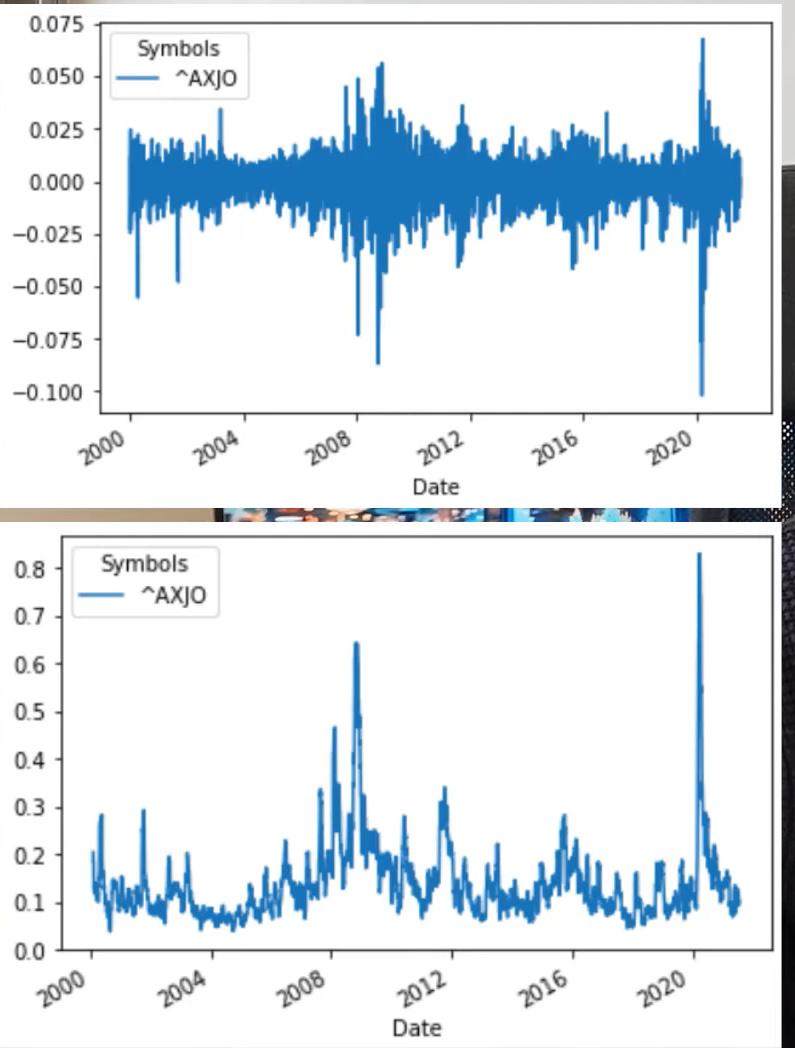


### Top Graph: Logarithmic Returns (`log_returns.plot()`)

This graph displays the daily logarithmic returns of the ASX200 index.

- **Y-axis**: Represents the logarithmic returns, where positive values indicate days when the market went up, and negative values show days when the market went down.
- **X-axis**: Shows the timeline from the year 2000 to 2020.

#### Observations:
- **Volatility**: The returns vary significantly over time, with some periods showing higher fluctuations (such as around 2008 and 2020). These peaks in the plot likely correspond to major market events or economic crises, such as the 2008 global financial crisis and the 2020 coronavirus pandemic.
- **Stability and Unrest**: Periods of relative flatness suggest times of market stability, whereas sharp spikes or deep falls indicate turbulent market conditions.
- **Use in Analysis**: This kind of plot helps traders and analysts understand the behavior of the market in terms of daily price changes and can be used to gauge the market's reaction to different events over time.

### Bottom Graph: Historical Volatility (`volatility.plot()`)

This graph shows the historical volatility of the ASX200, calculated as the rolling standard deviation of the log returns, annualized.

- **Y-axis**: Represents the level of volatility; higher values indicate more uncertainty or risk in the market.
- **X-axis**: Represents the same timeline as the returns graph.

#### Observations:
- **Periods of High Volatility**: Notable spikes in volatility occur around significant market events. For example, the highest spikes around 2008 and 2020 correspond to the financial crisis and the pandemic, respectively.
- **General Trends**: Volatility is not constant; it fluctuates significantly over time, indicating changing market conditions and investor sentiment.
- **Trading Implications**: High volatility periods are often seen as potential opportunities for traders, especially those who engage in strategies that benefit from large price swings. Conversely, low volatility periods might favor strategies that capitalize on stable, predictable market movements.

### Conclusion

**Logarithmic Returns** quantify the percentage change in the price of an asset from one day to the next, expressed in log terms to simplify computations across time periods and facilitate additive properties for portfolio calculations.

**Historical Volatility** measures the standard deviation of logarithmic returns over a specific time period, reflecting the variability or risk associated with the asset's price movements within that timeframe. It is typically annualized to allow comparisons over different periods.

The Python function `ThirdThurs` and the subsequent code you've provided perform multiple operations related to generating dates and calculating the historical volatility for different trading periods. Let's dissect the function and explain what each part of the code does.

### Function: `ThirdThurs`

The purpose of this function is to calculate the date of the third Thursday of a given month and year. It's typically used in financial contexts where certain events or expiries (like options or futures contracts) occur on a specific weekday of a month.

```python
def ThirdThurs(year, month):
    # Find the last day of the month
    daysInMonth = calendar.monthrange(year, month)[1]
    date = dt.date(year, month, daysInMonth)

    # Back up to the most recent Thursday
    offset = 4 - date.isoweekday()
    if offset > 0: offset -= 7  # Back up one week if necessary
    date += dt.timedelta(offset)  # date is now the last Thursday in month

    # Check if the calculated date has already passed
    now = dt.date.today()
    if date.year == now.year and date.month == now.month and date < now:
        raise Exception('Missed third thursday')

    # Return the third Thursday by subtracting 7 days from the last Thursday
    return date - dt.timedelta(7)
```

### Explanation:
- **Find Last Day**: It calculates the last day of the specified month.
- **Identify Last Thursday**: It then finds the last Thursday of that month.
- **Adjust for Third Thursday**: By subtracting 7 days, it adjusts the date to the third Thursday.
- **Error Checking**: If the third Thursday is in the past (relative to today's date when the function is called), it raises an exception. This is useful for ensuring the function does not return a date that is not relevant for future-based operations (like trading).

### Additional Code Analysis

After defining the function, you create a list of third Thursday dates for each month from the year 2000 to 2021 that are prior to today's date:
```python
dates = [ThirdThurs(year, month) for year in range(2000,2022) for month in range(1,13) if ThirdThurs(year, month) < dt.datetime.now().date()]
```

### Data and Volatility Calculations

1. **Trading Periods and Days to Expiry (DTE)**:
   - You define trading days and days to expiry for various standard contract lengths in financial markets.
   - `tradingDays` are the approximate number of trading days in each of the periods (1, 3, 6, 9, 12 months).
   - `DTE` are days to expiry which are multiples of 30 days, representing standard contract expiry terms.

2. **Creating a Data Structure**:
   - `data` is an array constructed to hold different pieces of information for further analysis, initialized with a sequence of numbers corresponding to the dates calculated earlier.

3. **Calculating Volatility**:
   - You calculate the rolling standard deviation (a measure of volatility) for the logarithmic returns over the windows defined by `tradingDays`, scaled to an annual basis by multiplying with the square root of 252 (the typical number of trading days in a year).
   - You use a dictionary `volatility` to store these calculations indexed by the time periods.

This code helps in analyzing the historical volatility over various durations relevant for trading, which is crucial for risk assessment and pricing strategies in the financial markets. The use of third Thursday is specific and crucial for markets where timing aligns with standardized contract expiries, affecting trading decisions.

In [ ]:
def ThirdThurs(year, month):
    # Create a datetime.date for the last day of the given month
    daysInMonth = calendar.monthrange(year, month)[1]   # Returns (month, numberOfDaysInMonth)
    date = dt.date(year, month, daysInMonth)
    # Back up to the most recent Thursday
    offset = 4 - date.isoweekday()
    if offset &gt; 0: offset -= 7                          # Back up one week if necessary
    date += dt.timedelta(offset)                    # dt is now date of last Th in month

    # Throw an exception if dt is in the current month and occurred before today
    now = dt.date.today()                         # Get current date (local time, not utc)
    if date.year == now.year and date.month == now.month and date &lt; now:
        raise Exception('Missed third thursday')

    return date - dt.timedelta(7)

dates = [ThirdThurs(year, month) for year in range(2000,2022) for month in range(1,13) if ThirdThurs(year, month) &lt; dt.datetime.now().date()]
columnsNames = ['1-mth','3-mth', '6-mth', '9-mth', '12-mth']
tradingDays = [int(20*n) for n in [1,3,6,9,12]]
DTE = [int(30*n) for n in [1,3,6,9,12]]
data = np.array([np.arange(len(dates))]*len(columnsNames)).T

tradingDays
volatility = {}
for TRADING_DAYS, TimePeriod in zip(tradingDays, columnsNames):
    print(TRADING_DAYS, TimePeriod)
    volatility[TimePeriod] = log_returns.rolling(window=TRADING_DAYS).std()*np.sqrt(252)

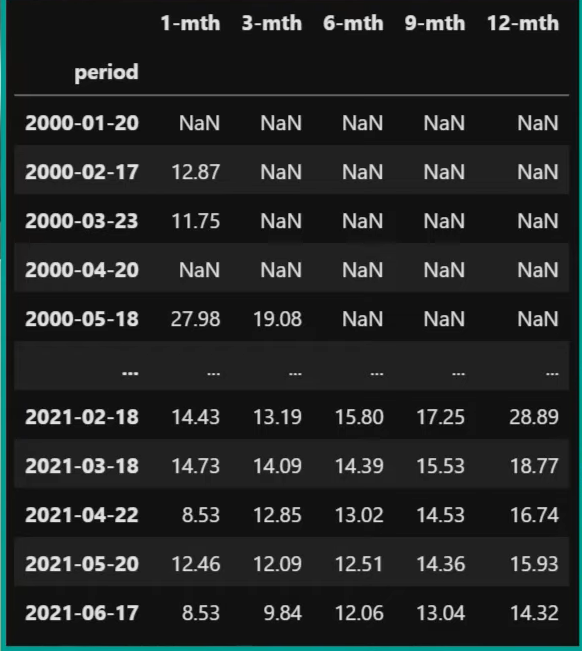

The image displays a data table showcasing historical volatility for the ASX200 index across various time frames, with the data arranged chronologically and calculated for different monthly periods (1-month, 3-month, 6-month, 9-month, and 12-month). Each row represents the historical volatility calculated as of the third Thursday of each month for the years 2000 to 2021. Here’s a detailed breakdown:

### Table Columns:
- **1-mth, 3-mth, 6-mth, 9-mth, 12-mth**: Each column shows the annualized historical volatility calculated over different time frames. The volatility is presented as a percentage, which represents the standard deviation of the logarithmic returns of the index, scaled up to an annual measure by multiplying by the square root of 252 (the typical number of trading days in a year).

### Table Rows:
- **Rows**: Each row corresponds to the third Thursday of a particular month and year (e.g., 2000-01-20, 2000-02-17, etc.). The dates serve as the reference point from which the historical volatility is calculated for the respective time frames.

### Observations and Interpretations:
- **NaN Values**: Not all time slots are filled with data; many cells contain "NaN" values. This typically indicates that there wasn't enough historical data available to calculate volatility for that period at that point in time. For instance, in early months like January 2000, there may not have been sufficient past data to calculate 3-month, 6-month, or longer periods of historical volatility.
- **Volatility Values**: Where present, the volatility values vary, reflecting the fluctuating nature of the market over different periods. For example:
  - **May 2000**: Shows a 1-month volatility of 27.98% and a 3-month volatility of 19.08%, suggesting significant price movements in the short term that were less pronounced over the longer period.
- **Recent Trends**: In the most recent entries (e.g., 2021), the data is more complete across all time periods, showing how volatility evolves from shorter to longer durations. This can be particularly insightful for assessing how market conditions have stabilized or fluctuated during different economic phases.

### Usage:
- **Trading and Risk Management**: Traders and risk managers use such data to understand volatility patterns, helping them in pricing derivatives, managing portfolio risks, and setting trading strategies.
- **Investment Decisions**: Investors might look at such volatility trends to decide on entry and exit points for trades, especially in derivatives markets where understanding price fluctuations is crucial.

This historical volatility table is a valuable tool for financial analysis, offering insights into how the ASX200 market volatility has behaved over two decades from specific monthly checkpoints.

### Data Frame Setup

```python
df = pd.DataFrame(data, columns=columnsNames, index=dates)
df.index.name = 'period'
```
This code creates a `DataFrame` named `df` using the data array, which corresponds to historical dates and their respective values. It sets the index to the `dates` computed earlier (the third Thursdays of each month) and names the columns using `columnsNames`, which represent different trading period intervals (1-month, 3-month, etc.). The index is named 'period', indicating the specific time intervals of interest.

### Function to Calculate Historical Volatility

```python
def historical_vol(x):
    df2 = x.copy()
    for date, val in x.iteritems():
        try:
            df2.loc[date] = round(volatility[x.name].loc[date,'^AXJO']*100,2)
        except:
            df2.loc[date] = np.nan
    return df2
```
This function `historical_vol` is designed to iterate through each column of the DataFrame (representing different time intervals). It attempts to fetch the historical volatility from the `volatility` dictionary (calculated and stored earlier) for each date. The volatility values are scaled by multiplying by 100 (to convert to percentages) and rounded to two decimal places for readability. If data is unavailable for any date (possibly because the moving average window is not fully available), it assigns `NaN`.

The fetched volatility is scaled up by multiplying by 100 and rounded to two decimal places in the function to convert the volatility from a decimal form (common in financial calculations) into a percentage form, which is more intuitive and commonly used for reporting and interpreting financial data. The rounding to two decimal places ensures that the displayed values are concise and easily comparable, which enhances readability and precision in financial analysis.

### Applying the Function to DataFrame

```python
df = df.apply(lambda x: historical_vol(x), axis=0)
```
This line applies the `historical_vol` function across columns (`axis=0`). It processes each time period's column separately, filling the DataFrame with historical volatility values where available.



In [ ]:
df = pd.DataFrame(data, columns=columnsNames, index=dates)
df.index.name = 'period'

def historical_vol(x):
    df2 = x.copy()
    for date, val in x.iteritems():
        try:
            df2.loc[date] = round(volatility[x.name].loc[date,'^AXJO']*100,2)
        except:
            df2.loc[date] = np.nan
    return df2

df = df.apply(lambda x: historical_vol(x),axis=0)

The provided Python code constructs a DataFrame (`df2`) to summarize the statistical measures of historical volatility data derived from another DataFrame (`df`). It is designed to present the maximum, mean, and minimum values of volatility for various time horizons represented by days to expiry (DTE). Here's a breakdown of each segment of the code:

1. **DataFrame Initialization**:
   ```python
   df2 = pd.DataFrame(data='', columns=['max','mean','min'], index=DTE)
   df2.index.name = 'DTE'
   ```
   - A new DataFrame `df2` is created with pre-specified columns ('max', 'mean', 'min') and indexed by `DTE` (Days to Expiry).
   - `index=DTE` sets the DataFrame's index to values representing different time horizons (30, 90, 180, 270, 360 days), which are critical in options trading and risk management.

2. **Filling Data**:
   ```python
   df2['max'] = pd.Series(df[columnsNames].max().values, index=DTE)
   df2['mean'] = pd.Series(df[columnsNames].mean().values, index=DTE)
   df2['min'] = pd.Series(df[columnsNames].min().values, index=DTE)
   ```
   - `df[columnsNames].max().values` calculates the maximum historical volatility from `df` for each column specified in `columnsNames` (1-mth, 3-mth, etc.), and associates these values with the corresponding `DTE`.
   - Similarly, the mean and minimum values are calculated and populated.
   - This provides a structured view of volatility metrics across different trading periods.

In [ ]:
df2 = pd.DataFrame(data='', columns=['max','mean','min'], index=DTE)
df2.index.name = 'DTE'

df2['max'] = pd.Series(df[columnsNames].max().values, index=DTE)
df2['mean'] = pd.Series(df[columnsNames].mean().values, index=DTE)
df2['min'] = pd.Series(df[columnsNames].min().values, index=DTE)

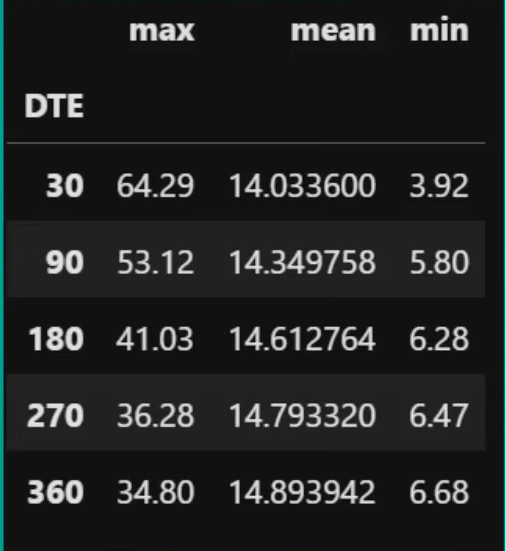

### Explanation of the Image:

The image displays the `df2` DataFrame which summarizes the historical volatility at different DTEs:
- **Columns**:
  - `max`: Shows the maximum historical volatility reached at each respective DTE.
  - `mean`: Displays the average historical volatility across the entire time period covered by the data for each DTE.
  - `min`: Lists the minimum historical volatility observed at each DTE.

- **Rows** (indexed by `DTE`):
  - Each row corresponds to a different day to expiry, starting from 30 days up to 360 days.

### Insights and Interpretations:

1. **Volatility Trends**:
   - As the DTE increases (moving from 30 days to 360 days), both the maximum and minimum volatilities generally decrease. This trend reflects the reducing uncertainty and risk as the time horizon extends. Markets tend to be more volatile in the short term than the long term, which is captured by these metrics.

2. **Stability Over Time**:
   - The mean volatility tends to stabilize as the DTE increases. This stability can be crucial for long-term financial planning and risk management in portfolios that hold or trade options expiring at these various intervals.

3. **Risk Management**:
   - Understanding the extremes (max and min) of historical volatility can help traders and risk managers in setting thresholds for their risk management strategies. Higher max values at lower DTEs can indicate potential for significant price movements in short durations, which might be critical for short-term trading strategies.

Overall, this DataFrame and its visualization offer a concise, clear way to understand how historical volatility behaves across different time periods, providing valuable insights for trading, risk management, and strategic decision-making in finance.

The graph titled "Historical Volatility Cone vs. Implied Volatility" is a visual representation comparing historical volatility data with current implied volatility over various days to expiry (DTE). It uses a combination of line plots to show how volatility behaves and fluctuates as the time to expiry of options contracts changes. Here’s a breakdown and interpretation of the elements and insights from the graph:

### Graph Elements:

1. **Lines**:
   - **Black lines with plus markers (`'k+-'`)**: Represent the maximum (`max`) and minimum (`min`) historical volatility values for each DTE. These lines frame the volatility cone, defining the upper and lower bounds of historical volatility fluctuations.
   - **Magenta squares line (`'ms-'`)**: Indicates the mean (average) historical volatility over the observed period for each DTE. This line provides a central tendency reference within the historical data.
   - **Green squares line (`'gs-'`)**: Shows the current implied volatility for different DTEs. This line allows comparison of current market expectations to historical norms.

2. **Annotations**:
   - Text labels above the magenta mean line show the exact mean volatility percentage at various DTE points, enhancing the interpretability of the data.
   - Text labels below the green current implied volatility line provide exact values, highlighting how current expectations compare to past performance.

3. **Axes**:
   - **X-axis (Days to Expiry, DTE)**: Ranges from 0 to 360 days, structured to cover typical durations for financial instruments like options and futures. The values are spaced out to represent intervals more clearly.
   - **Y-axis (Volatility, %)**: Scales from 0% to 70%, set to encompass the full range of observed volatility values.

### Insights and Analysis:

- **Volatility Trend**: The black lines show that volatility tends to decrease as DTE increases, a common pattern due to the uncertainty reduction as one approaches closer to known outcomes or expiry dates. The cone shape, formed by the max and min lines, narrows towards longer DTEs, suggesting less dispersion in historical data as time to expiry increases.
  
- **Comparison to Implied Volatility**: The green line (current implied volatility) allows for direct comparison with historical norms. In this graph, current implied volatility for most DTE points is substantially below the historical mean, which could imply that the market is currently less volatile than usual, or that it expects less volatility in the future compared to past periods.

- **Strategic Implications**: Traders and risk managers might use such a graph to assess whether options are priced appropriately relative to historical volatility. If current implied volatility is significantly lower than the historical mean, options might be undervalued, and vice versa.

- **Market Sentiment**: This type of analysis can also offer insights into market sentiment and potential reactions to upcoming events or economic indicators.

### Conclusion:

The graph serves as a crucial tool in options trading and risk management, providing a historical context for making informed decisions based on how current market conditions compare to past trends. It aids in identifying periods of potential overpricing or underpricing of volatility, which are key opportunities in volatility trading strategies.

In [ ]:
fig1 = plt.figure(figsize=(12,8))
ax1 = fig1.add_subplot(111)

plt.plot(df2.index, df2['max'], 'k+-')
plt.plot(df2.index, df2['mean'], 'ms-')

plt.plot(df2.index, df.iloc[-1,:], 'gs-')

plt.plot(df2.index, df2['min'], 'k+-')

for i, v in df2['mean'].iteritems():
    ax1.text(i, v+1, "%d" %v, ha="center")
for i, v in enumerate(df.iloc[-1,:]):
    ax1.text(df2.index[i], v-2.5, "%d" %v, ha="center")

plt.title('Historical Volatility Cone vs. Implied volatility')
plt.legend(['max', 'mean', 'current','min' ], loc='upper right')

plt.xlabel('Days to Expiry (DTE)')
plt.ylabel('Volatility (%)')
plt.xticks(np.linspace(0,360,13))
plt.ylim(0, 70)
plt.xlim(0, 370)

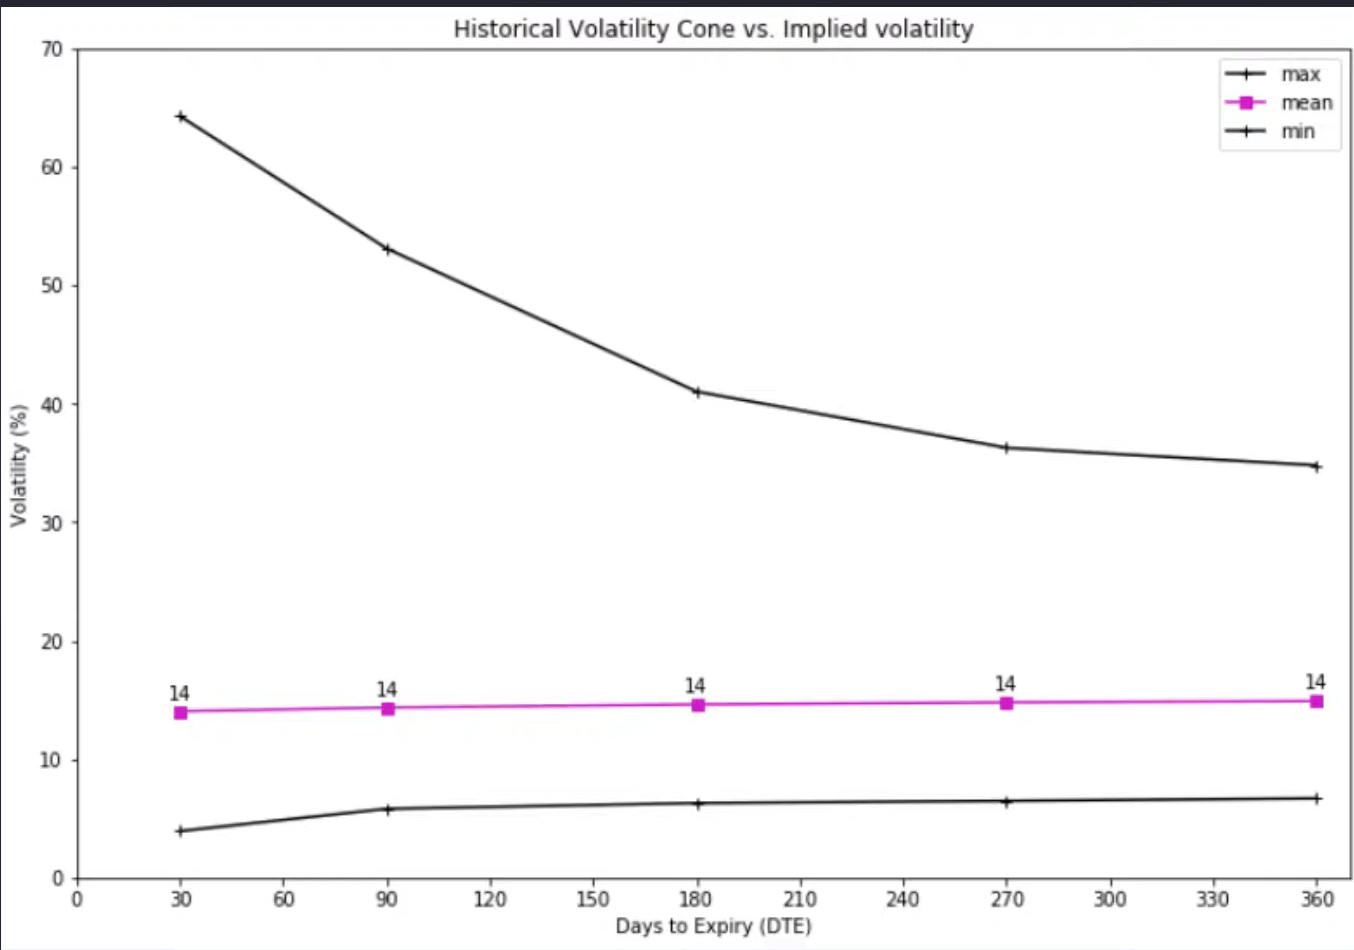



The graph titled "Historical Volatility Cone vs. Implied Volatility" (below)visually compares the historical volatility data of an asset or index with its current implied volatility over different Days to Expiry (DTE). This graph is essential for options traders and financial analysts because it helps assess how current market conditions relate to historical patterns. Here's an analysis of the graph's components and its implications:

### Graph Elements:

1. **Volatility Lines**:
   - **Black Lines**: Show the maximum and minimum historical volatility (marked with 'max' and 'min'), forming the outer bounds of the historical volatility cone.
   - **Magenta Line**: Represents the mean (average) historical volatility. This line gives a central reference point within the historical volatility data.
   - **Green Line**: Indicates the current implied volatility at various DTEs. This line is crucial for comparing current market expectations against historical data.

2. **Annotations**:
   - **Magenta and Green Squares**: These mark specific data points on the mean historical volatility and the current implied volatility lines, respectively.
   - **Numbers Near Points**: Show the actual volatility percentages at various DTEs, providing precise information for detailed analysis.

3. **Axes**:
   - **X-axis (Days to Expiry, DTE)**: This axis indicates the time remaining until the options based on this volatility data expire, ranging from 30 to 360 days.
   - **Y-axis (Volatility, %)**: Displays the volatility scale from 0% to 70%, encompassing the range of observed volatility values from the minimum to the maximum.

### Insights and Analysis:

- **Volatility Trends**: The black lines indicate that historical volatility generally decreases as the DTE increases. This pattern reflects greater uncertainty in price movements over shorter periods and stabilizing expectations as the expiry date approaches.
  
- **Comparison to Implied Volatility**: The green line (current implied volatility) is crucial for evaluating how the current market's expectations of future volatility compare with historical norms. In this plot, the implied volatility remains consistently below the historical mean across most DTEs, suggesting that the market currently expects less volatility than the average levels experienced historically.

- **Strategic Implications**:
   - **Options Pricing**: If the current implied volatility is significantly below the historical mean, it might suggest that options are relatively cheaper, potentially indicating a buying opportunity for options traders.
   - **Risk Assessment**: Understanding where the current implied volatility lies in relation to historical volatility helps in assessing the risk and potential reward scenarios for options strategies.

- **Market Sentiment**: This analysis might reflect broader market sentiment, indicating whether traders expect more or less volatility in the future compared to past conditions. Such insights are invaluable during periods of financial uncertainty or economic announcements.

### Importance:

This graph is fundamentally important for options trading, where understanding volatility is crucial to pricing and trading strategies. It helps in:
- **Identifying Market Anomalies**: Spotting periods where the implied volatility significantly deviates from historical trends can signal trading opportunities or risks.
- **Guiding Trading Decisions**: Traders can use this data to adjust their positions based on expected market movements, enhancing their strategies' effectiveness and managing risk more efficiently.

In summary, this graph serves as a powerful tool for financial analysis, offering a detailed comparison between past and expected future market behaviors, which is vital for making informed trading decisions in the options market.

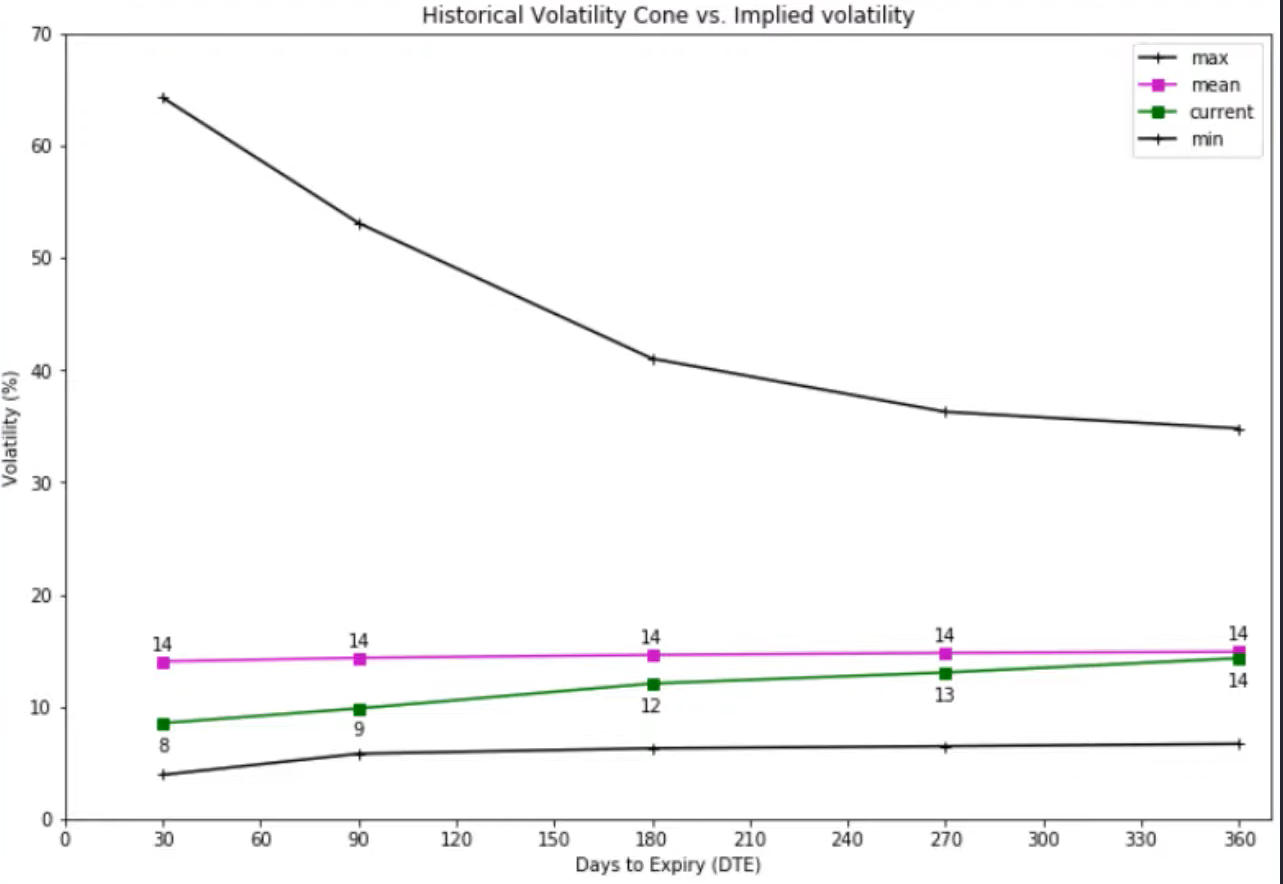



The Python function `implied_vol` provided calculates the implied volatility of an European-style option using a numerical method known as Newton-Raphson iteration. The function leverages the Black-Scholes model for option pricing along with the Vega of the option (which measures the sensitivity of the option price to changes in volatility). Here’s a detailed breakdown and explanation of the function and its components:

### Function Parameters:
- **S0**: Current stock price (also known as the underlying price).
- **K**: Strike price of the option.
- **T**: Time to maturity (expressed in years).
- **r**: Risk-free interest rate (annual).
- **market_price**: The current market price of the option.
- **flag**: Type of option; 'c' for call and 'p' for put.

### Process Explained:
1. **Initial Setup**:
   - **vol_old**: An initial guess for the implied volatility, set at 30% (0.3). Starting values are crucial for iterative methods as they influence convergence speed and stability.
   - **max_iter**: Maximum number of iterations allowed, set to 200, to prevent infinite loops if convergence isn't achieved.

2. **Iteration Using Newton-Raphson Method**:
   - The loop runs for up to `max_iter` times, or until the change in calculated volatility or option price is sufficiently small (`tol` tolerance level).
   - In each iteration:
     - **bs_price**: The Black-Scholes model price of the option is calculated using the current guess for volatility (`vol_old`).
     - **Cprime**: Vega of the option, scaled by 100 (likely for percentage form), which measures the sensitivity of the option price to a change in volatility.
     - **C**: The difference between the calculated Black-Scholes price and the actual market price.
     - **vol_new**: Updated guess for the volatility, adjusted based on the ratio of C to Cprime (using the Newton-Raphson formula to find roots of a function).

3. **Convergence Check**:
   - After each iteration, it checks if the absolute difference between the new and old volatility guesses is less than the tolerance level, or if the recalculated Black-Scholes price using the new volatility is sufficiently close to the market price.
   - If either condition is met, the loop breaks, indicating that convergence has been achieved.

4. **Return Value**:
   - **implied_vol**: The function returns the last calculated value of `vol_new` as the implied volatility.

### Usage:
This function is crucial for traders and financial analysts to determine the implied volatility from market prices of options, which is a key indicator of market sentiment and volatility expectations. It's often used in risk management, trading strategies, and valuation of options.

### Benefits and Importance:
- **Market Insight**: Implied volatility provides insight into future volatility as perceived by the market, which can be different from historical volatility.
- **Pricing Options**: Accurately priced options help in identifying trading opportunities such as arbitrage.
- **Risk Management**: Implies volatility is crucial for managing the risk of options portfolios, especially in dynamic market conditions.

By applying this function, financial professionals can enhance their decision-making process, ensuring that they are aligning their strategies with current market conditions and expectations.

In [ ]:
from py_vollib.black_scholes.implied_volatility import implied_volatility as iv
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import vega

def implied_vol(S0, K, T, r, market_price, flag='c', tol=0.00001):
    """Calculating the implied volatility of an European option
        S0: stock price
        K: strike price
        T: time to maturity
        r: risk-free rate
        market_price: option price in market
    """
    max_iter = 200 #max no. of iterations
    vol_old = 0.3 #initial guess

    for k in range(max_iter):
        bs_price = bs(flag, S0, K, T, r, vol_old)
        Cprime = vega(flag, S0, K, T, r, vol_old)*100
        C = bs_price - market_price

        vol_new = vol_old - C/Cprime
        new_bs_price = bs(flag, S0, K, T, r, vol_new)
        if (abs(vol_old-vol_new) &lt; tol or abs(new_bs_price-market_price) &lt; tol):
            break

        vol_old = vol_new

    implied_vol = vol_new
    return implied_vol

The given Python code snippet calculates the implied volatility for a set of at-the-money (ATM) options based on their bid and ask prices for both call and put options. The code uses the `implied_vol` function, which employs the Black-Scholes model, to compute the implied volatility from market prices of options, considering various factors like the underlying price, strike price, time to maturity, and risk-free rate. Here's a detailed breakdown and explanation of the code:

### Code Components:

1. **Data Structure `atm_options`**:
   - This is a list of lists where each sublist represents an option with details such as the expiry date, strike price (`K`), call bid and ask prices, and put bid and ask prices.

2. **Variable Initialization**:
   - `call_bids`, `call_asks`, `put_bids`, `put_asks`: These lists will store the calculated implied volatilities for the bid and ask prices of calls and puts respectively.
   - `IV_DTE`: List to store the days to expiry (DTE) for each option.

3. **Iterating Over the Options Data**:
   - The code iterates through each entry in the `atm_options` list. For each option, it performs the following operations:
     - **Date and Strike Extraction**: Extracts the option's expiry date and strike price.
     - **DTE Calculation**: Computes the days to expiry (`DTE`) by subtracting today's date from the expiry date.
     - **Time to Maturity (`T`)**: Converts `DTE` to years by dividing by 365, as required by the Black-Scholes model for the time parameter.
     - **Risk-Free Rate (`r`)**: Set to 0.02 (or 2%), a typical assumption for such calculations.
     - **Market Prices Preparation**: Retrieves and prepares the bid and ask prices for calls and puts from the data structure.

4. **Volatility Calculation**:
   - Uses the `implied_vol` function to calculate implied volatilities for each of the bid and ask prices of the calls and puts:
     - The prices are multiplied by 100, assuming the prices in `atm_options` are in a format that needs scaling (this depends on how the prices are quoted, e.g., as per 100 nominal value).
     - The resulting volatilities are stored in the respective lists after multiplying by 100 to convert the output from decimal to percentage format.

5. **Storing Days to Expiry**:
   - The days to expiry for each option are stored in the `IV_DTE` list for potential further analysis or plotting.

### Implications and Usage:

- **Implied Volatility Insights**: The calculated implied volatilities provide insight into how the market views the uncertainty or risk associated with each option as its expiry approaches. High implied volatility suggests expectations of higher price fluctuations.
  
- **Pricing and Strategy Development**: Traders can use this data to assess whether options are relatively overpriced or underpriced based on their implied volatilities. It's crucial for strategies like volatility arbitrage.

- **Risk Assessment**: Understanding implied volatility helps in managing the risk associated with options trading, especially in dynamically changing market environments.


In [ ]:
S0 = 7375

atm_options = [
[dt.date(2021,8,19),7375,[0.88,0.98],[1.09,1.2]],
[dt.date(2021,9,16),7375,[1.06,1.16],[1.91,2.06]],
[dt.date(2021,10,21),7375,[1.54,1.67],[2.42,2.58]],
[dt.date(2021,11,18),7375,[1.76,1.94],[2.82,3.17]],
[dt.date(2021,12,16),7250,[2.7,2.95],[2.6,2.85]],
[dt.date(2022,3,17),6000,[12.13,12.9],[0.87,0.98]]
]
call_bids,call_asks,put_bids,put_asks, = [],[],[],[]
IV_DTE = []

for i in atm_options:
    date, K = i[0], i[1]
    DTE = (date - dt.date.today()).days
    T = DTE/365
    r = 0.02
    call_bid, call_ask = i[2]
    put_bid, put_ask = i[3]

    call_bids.append(implied_vol(S0, K, T, r, call_bid*100, flag='c')*100)
    call_asks.append(implied_vol(S0, K, T, r, call_ask*100, flag='c')*100)
    put_bids.append(implied_vol(S0, K, T, r, put_bid*100, flag='p')*100)
    put_asks.append(implied_vol(S0, K, T, r, put_ask*100, flag='p')*100)
    IV_DTE.append(DTE)

In [ ]:
fig1 = plt.figure(figsize=(12,8))
ax1 = fig1.add_subplot(111)

plt.plot(df2.index, df2['max'], 'k+-')
plt.plot(df2.index, df2['mean'], 'ms-')

plt.plot(df2.index, df.iloc[-1,:], 'gs-')

plt.plot(IV_DTE, call_asks, 'bo--')
plt.plot(IV_DTE, call_bids, 'ro--')

plt.plot(IV_DTE, put_asks, 'bs-')
plt.plot(IV_DTE, put_bids, 'rs-')

HV_30d = log_returns.rolling(window=30).std()*np.sqrt(252)
plt.plot(range(0,221), HV_30d.values[-221:][::-1]*100, 'c--')
plt.plot(df2.index, df2['min'], 'k+-')

for i, v in df2['mean'].iteritems():
    ax1.text(i, v+1, "%d" %v, ha="center")
for i, v in enumerate(df.iloc[-1,:]):
    ax1.text(df2.index[i], v-2.5, "%d" %v, ha="center")

plt.title('Historical Volatility Cone vs. Implied volatility')
plt.legend(['max', 'mean', 'current', 'Call Ask IV','Call Bid IV', 'Put Ask IV','Put Bid IV',
            '30-day HV',
            'min' ], loc='upper right')

plt.xlabel('Days to Expiry (DTE)')
plt.ylabel('Volatility (%)')
plt.xticks(np.linspace(0,360,13))
plt.ylim(0, 70)
plt.xlim(0, 370)

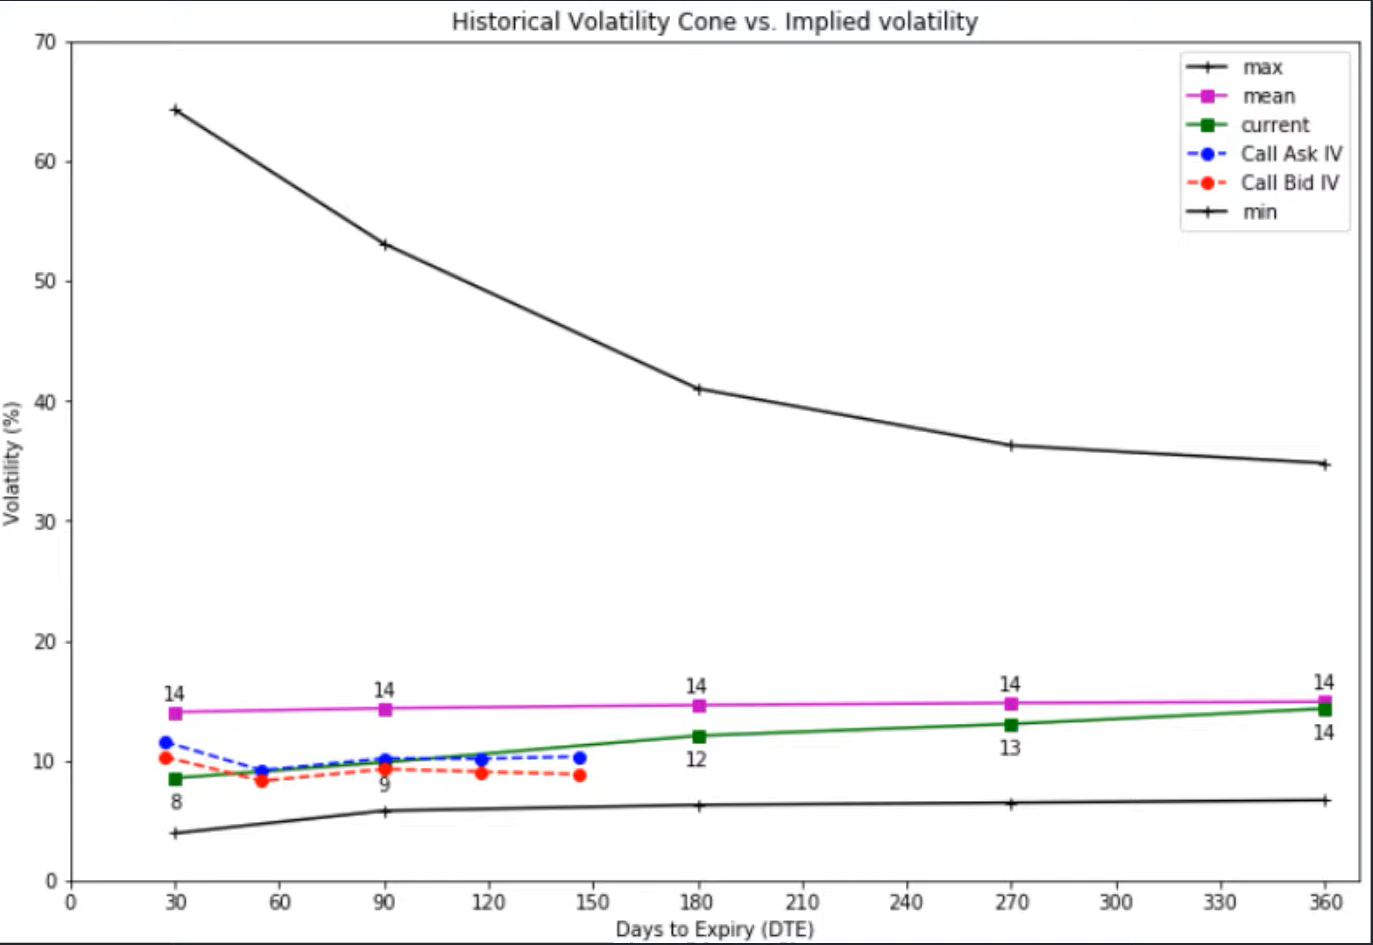

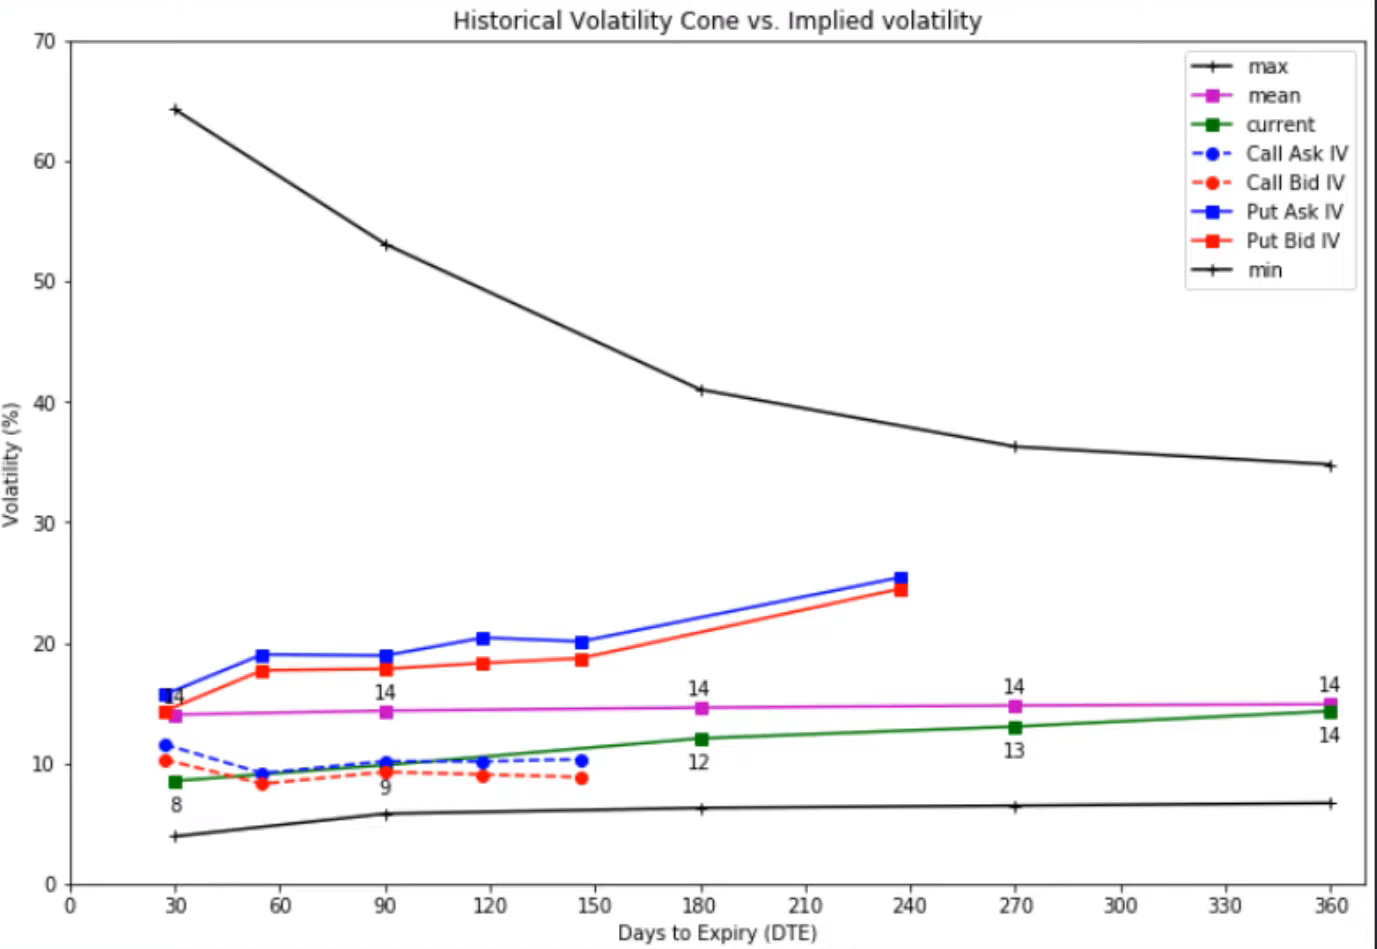

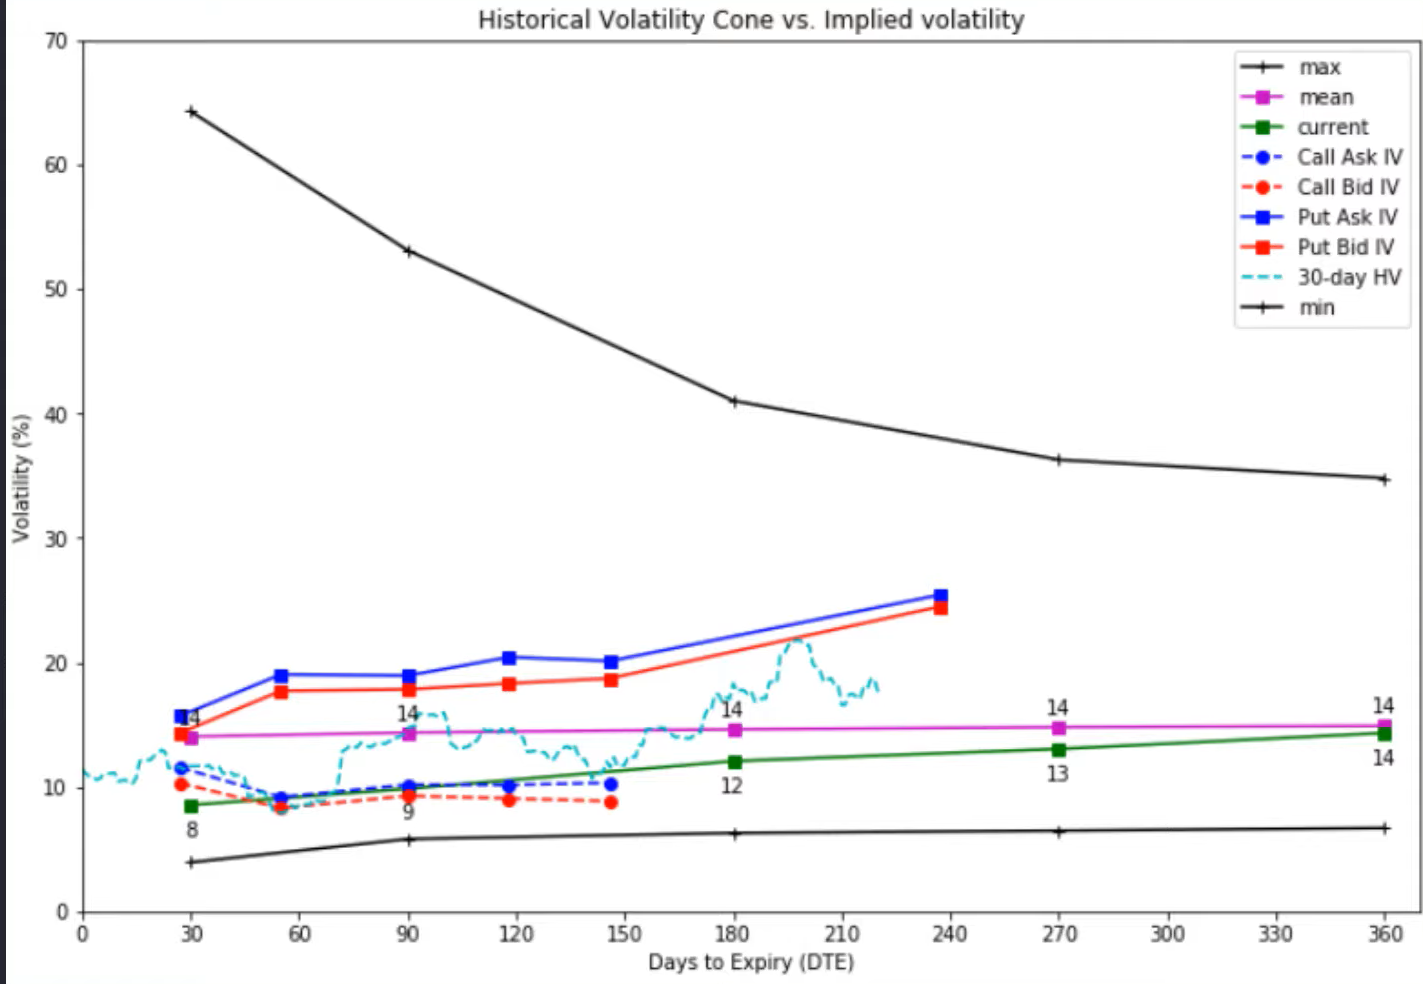

The series of graphs you've provided visually compare historical volatility data with implied volatilities derived from both call and put options over various Days to Expiry (DTE). Each plot builds upon the previous by adding layers of data, providing a comprehensive view of market dynamics as perceived through both historical and current implied volatilities. Let's break down each graph:

### First Graph
#### Elements:
- **Black Lines (max and min)**: Display the maximum and minimum historical volatility levels, creating the boundaries of the historical volatility cone.
- **Magenta Line (mean)**: Represents the average historical volatility over time.
- **Green Line (current)**: Indicates the current implied volatility, likely derived from at-the-money options for the nearest expiry.
- **Blue Dots and Red Dots (Call Ask and Bid IV)**: Implied volatilities from the ask and bid prices of call options, respectively.
- **Annotations**: Display specific volatility percentages directly on the graph for immediate reference.

#### Insights:
- The implied volatilities for calls (both ask and bid) typically lie within the historical volatility cone, suggesting that current market expectations (as represented by these prices) are in line with historical norms.
- There's a notable spread between the ask and bid implied volatilities, indicating liquidity or uncertainty factors at play in the options market.

### Second Graph
#### Added Elements:
- **Blue Squares and Red Squares (Put Ask and Bid IV)**: Represent implied volatilities from the ask and bid prices of put options.
- The additional data points for put options offer a mirrored insight similar to calls, showing how both sides of the market are pricing risk.

#### Insights:
- Put implied volatilities generally follow a similar trend to call implied volatilities, indicating consistent market sentiment across both types of options.
- Comparing put and call implied volatilities can provide insights into market skew—whether the market is pricing more risk into upward or downward movements.

### Third Graph
#### Added Elements:
- **Cyan Dashed Line (30-day Historical Volatility, HV)**: Represents a rolling calculation of 30-day historical volatility, providing a near-term historical context that is more directly comparable to the current implied volatilities.
  
#### Insights:
- The 30-day HV line shows short-term historical volatility trends, which can be more volatile and provide a recent snapshot of market dynamics.
- There is a discrepancy between short-term historical volatility and both the long-term historical mean and current implied volatilities. This can indicate that recent market conditions are more volatile than the norm or that the market anticipates changes not reflected in the longer-term historical data.

### General Insights and Conclusions Across All Graphs:
- **Volatility Trends**: The decline in historical volatility as DTE increases is consistent across all plots. This trend is typical in financial markets where uncertainties reduce as the option approaches expiry.
- **Market Efficiency and Sentiment**: The graphs collectively reveal how well the current implied volatilities align with historical data, providing a measure of market efficiency and sentiment. If current implied volatilities are significantly different from historical patterns, it might suggest new information or shifts in market perception.
- **Strategic Applications**: Traders can use these insights to adjust their strategies. For instance, if current implied volatilities are significantly above historical norms, it might suggest options are overpriced, favoring selling strategies. Conversely, if they are below, it might indicate buying opportunities.
- **Risk Management**: Understanding the spread between bid and ask and the positioning of current implied volatilities against historical can help in better risk management and option pricing strategies.

### Importance:
These graphs are crucial for options traders, financial analysts, and risk managers, as they combine historical perspective with current market conditions, allowing for informed decision-making regarding option trading strategies and risk assessment. They also help in identifying anomalies in market pricing, potentially signaling arbitrage opportunities or the need for further investigation into underlying factors.


### 1. What does the blue line imply (30-day HV)?
The blue dashed line represents the 30-day Historical Volatility (HV). It is calculated by determining the standard deviation of the logarithmic returns over the past 30 days, annualized (multiplied by the square root of 252, assuming 252 trading days in a year). This line provides a recent snapshot of the asset's volatility, reflecting short-term market movements and sentiment.

### 2. What does the green line imply (current)?
The green line depicts the current implied volatility of at-the-money (ATM) options, likely sourced from near-term expiries. Implied volatility is derived from the market price of the options and indicates the market's expectation of future volatility over the life of the option.

### 3. Why is there a difference in call and put lines? Is this some call-put spread?
The difference in the call and put lines (shown in red and blue for bid and ask prices respectively) indicates the implied volatilities derived from the market prices of call and put options. The discrepancy between these lines can arise due to several factors:
   - **Market Sentiment**: Different market perceptions of upside versus downside risks.
   - **Demand-Supply Dynamics**: Higher demand for puts in fear-driven markets can drive up put prices and their implied volatilities compared to calls, and vice versa.
   - **Skew and Smile**: These terms describe how implied volatility differs for options with different strikes. Skew often shows that out-of-the-money puts are priced with higher implied volatilities than calls due to the common fear of market drops.

This is not directly indicative of a call-put spread strategy but rather shows the volatility skew or smile that is a common characteristic in options markets.

### 4. What can we make out from the blue line (30-day HV), call and put lines, and the green line (current) and their relation?
- **Comparison of Historical vs. Implied Volatility**: The 30-day HV provides a basis for assessing how much the current market conditions (implied volatility) deviate from the recent historical behavior of the market.
- **Market Efficiency or Discrepancies**: If the current implied volatility (green line) is significantly higher or lower than the 30-day HV, it might suggest that the market expects future volatility to diverge from recent trends, possibly due to upcoming events or changes in market sentiment.
- **Risk Assessment**: Understanding the relation between these lines helps in assessing whether options are priced appropriately, whether protective puts are expensive, and whether speculative calls are cheap or expensive.

### 5. Why is there IV written after call and put?
"IV" stands for Implied Volatility. When you see "Call Ask IV," "Call Bid IV," "Put Ask IV," and "Put Bid IV," these terms indicate that the numbers derived are specifically the implied volatilities calculated from the ask and bid prices of calls and puts, respectively. This distinction is crucial because each price point can indicate different levels of market expectation and risk pricing.

### 6. Why do we use these volatility cones and tell their importance using the observations found in the graph?
Volatility cones are used to gauge the range of historical volatilities over different time frames and compare them against current implied volatility. They serve several important functions:
- **Benchmarking**: They provide a way to assess whether current implied volatility is unusually high or low in a historical context.
- **Risk Management**: By understanding where the current implied volatility stands relative to historical extremes, traders can better manage their options strategies and exposure.
- **Strategic Trading**: Traders can identify potential mispricings or arbitrage opportunities if the current implied volatility falls outside the historical norms.

**From the Graph**:
- The observations indicate that the current implied volatility for options is well within the historical norms but tends toward the lower boundary of the historical volatility cone. This could imply that the market might be underestimating future volatility or that there is a lower expectation of drastic price movements, possibly due to prevailing market conditions or sentiment at the time of data capture.

These insights and data visualizations are invaluable for traders, analysts, and portfolio managers, helping them make more informed decisions based on both historical data and current market expectations.